In [1]:
import numpy as np
import MDAnalysis as mda
import importlib
import XS_calc
from XS_calc import *

In [342]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc

In [350]:
# This would be a typical use case
U = mda.Universe('data/Ala10.pdb')
traj = Trajectory(U, selection='protein', use_CRYSOL=True, match_FoXS=False)

mea = Measurement(q = np.linspace(0.000, 0.5, num=500))
# XS = traj_calc(traj, env, mea)

# Do something with XS. E.g. fitting etc.


The protein has 104 atoms


In [365]:
frame = traj.Frames[0]
env = Environment(c1=1.00, c2=2.00, num_raster=512)
frame.SASA_calc(env, force_recalc=True)

FF_q, _ = FF_calc(frame, env, mea)

# an i by j matrix of distances between all atoms
d_ij = np.sqrt(np.sum((frame.xyz[None,:,:]-frame.xyz[:,None,:])**2, axis=2))

XS = np.zeros(np.shape(mea.q))
for i in np.arange(frame.mol.n_atoms):
    for j in np.arange(i+1, frame.mol.n_atoms):
#         print(i,j, d_ij[i,j])
        qd = mea.q * d_ij[i,j]
        XS += 2 * FF_q[i] * FF_q[j] * np.sinc(qd / np.pi)
    XS += FF_q[i] ** 2

In [366]:
XS[0]

27576.382791849122

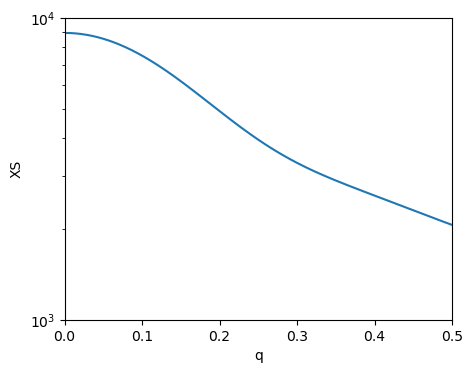

In [346]:
%matplotlib inline
plt.figure(figsize=(5,4), dpi=100)
plt.plot(mea.q,XS)
plt.ylabel('XS')
plt.xlabel('q')
plt.yscale('log')
plt.ylim([1e3, 1e4])
plt.xlim([0, 0.5])
plt.show()

In [328]:
XS[-1]

2060.232989297558

In [256]:
frame = traj.Frames[0]
env = Environment(c1=1.00, c2=0.00)
frame.SASA_calc(env)

FF_q, _ = FF_calc(frame, env, mea)

# an i by j matrix of distances between all atoms
d_ij = np.sqrt(np.sum((frame.xyz[None,:,:]-frame.xyz[:,None,:])**2, axis=2))

XS2 = np.zeros(np.shape(mea.q))
for i in np.arange(frame.mol.n_atoms):
    for j in np.arange(i, frame.mol.n_atoms):
        qd = mea.q * d_ij[i,j]
        XS2 += 2 * FF_q[i] * FF_q[j] * np.sinc(qd / np.pi )
#     XS += FF_q[i] ** 2

In [257]:
d_ij.shape

(104, 104)

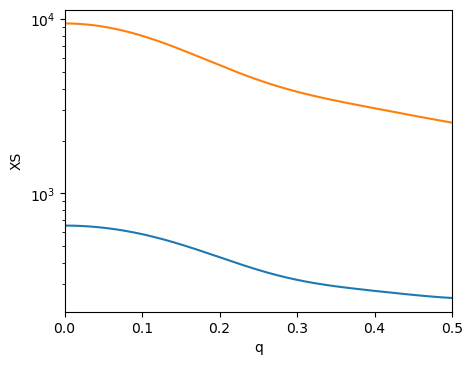

In [248]:
%matplotlib inline
plt.figure(figsize=(5,4), dpi=100)
plt.plot(mea.q,XS)
plt.plot(mea.q,XS2)
plt.ylabel('XS')
plt.xlabel('q')
plt.yscale('log')
# plt.ylim([1e3, 1e4])
plt.xlim([0, 0.5])
plt.show()

In [239]:
traj.Molecule.elements

array(['N', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H',
       'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C',
       'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'H',
       'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N',
       'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H',
       'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H',
       'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O',
       'N', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'H'],
      dtype=object)

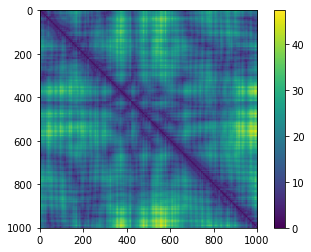

In [49]:
import matplotlib.pyplot as plt
# %matplotlib notebook

plt.imshow(d_ij)
plt.colorbar()

In [ ]:
def frame_XS_calc(frame, env, mea, ignoreSASA=False): # Calculate the X-ray scattering of a frame
    if not ignoreSASA:
        # Get the SASA calculated if not done
        frame.SASA_calc(env)

    # Calculate adjusted form factors as a table.
    FF_q = FF_calc(frame, env, mea)

    # Calculate scattering signal XS
    ...

    return XS

In [285]:
importlib.reload(XS_calc) # This reloads XS_calc
from XS_calc import *     # This updates the functions in XS_calc
# This would be a typical use case
U = mda.Universe('data/Ala10.pdb')
traj = Trajectory(U, selection='protein', use_CRYSOL=True, match_FoXS=True)

mea = Measurement(q = np.linspace(0.000, 0.5, num=500))
# XS = traj_calc(traj, env, mea)

# Do something with XS. E.g. fitting etc.
frame = traj.Frames[0]
env = Environment(c1=1.00, c2=0.00, num_raster=200)
frame.SASA_calc(env)

FF_q, _ = FF_calc(frame, env, mea)

# an i by j matrix of distances between all atoms
d_ij = np.sqrt(np.sum((frame.xyz[None,:,:]-frame.xyz[:,None,:])**2, axis=2))

XS = np.zeros(np.shape(mea.q))
for i in np.arange(frame.mol.n_atoms):
    for j in np.arange(i+1, frame.mol.n_atoms):
        qd = mea.q * d_ij[i,j]
        XS += 2 * FF_q[i] * FF_q[j] * np.sinc(qd / np.pi )
    XS += FF_q[i] ** 2
print(XS[0]) 
# Darren's: 9460.89


The protein has 104 atoms
8905.454399538507
